In [6]:
cd Project

C:\Users\ashok\Downloads\Project


In [9]:
#loading the dataset 
#Importing pandas library 
import pandas as pd 
import numpy as np

#Reading the dataset 
mydata=pd.read_csv('Football teams.csv')
mydata.describe()

#Input and output features 
#Input features 


X = mydata.drop(['Rating' , 'Team' , 'Tournament'] , axis=1)

#Output features 

y = mydata.drop(['Goals' , 'Shots pg' , 'yellow_cards' , 'red_cards' , 'Possession%' , 'Pass%' , 'AerialsWon' , 'Team' , 'Tournament' ] , axis=1)

#Splitting the dataset into training and testing datset 
#Importing train_test_split function 

from sklearn.model_selection import train_test_split

#Splitting the dataset 

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.21 , random_state=20)



In [8]:
#Random Forest Model 
from sklearn.ensemble import RandomForestRegressor

#Instantion of the mode 

model = RandomForestRegressor(n_estimators=40, random_state=40)

#Fitting the model 
LL_rf = model.fit(X_train , y_train.values.ravel())


#Training the mode evaluation 
#The training r_sq

print(LL_rf.score(X_train , y_train.values.ravel()))




0.9634055306430677


In [142]:
from sklearn.metrics import mean_absolute_error , mean_squared_error , explained_variance_score , r2_score
#Prediction on the training dataset 
ytrain_pred = LL_rf.predict(X_train)

#The MAE 

print( mean_absolute_error(y_train , ytrain_pred))

0.01944805194805163


In [116]:
#The MSE 

print( mean_squared_error(y_train , ytrain_pred))

0.0005819415584415546


In [117]:
#The EVS 
print(explained_variance_score(y_train , ytrain_pred))

0.9634055412491411


In [118]:
#The RMSE 
print(np.sqrt(mean_squared_error(y_train , ytrain_pred)))

0.02412346489295339


In [10]:
#Predicting the testing data 

ytest_pred = LL_rf.predict(X_test)
print(ytest_pred)


[6.5305  6.5235  6.821   6.579   6.57425 6.7255  6.84175 6.583   6.86275
 6.6     6.592   6.50575 6.47725 6.5075  6.777   6.5575  6.77525 6.58925
 6.58    6.74575 6.72125]


In [120]:
#The testing coeff of determination 

print(LL_rf.score(X_test,y_test))


0.8064227798881923


In [121]:
#The metrics 
#The MAE
print( mean_absolute_error(y_test , ytest_pred))

0.055773809523809045


In [122]:
#The MSE
print( mean_squared_error(y_test , ytest_pred))

0.004286967261904666


In [123]:
#The RMSE
print( np.sqrt(mean_squared_error(y_test , ytest_pred)))

0.06547493613517058


In [11]:
#The EVS
print(explained_variance_score(y_test , ytest_pred))
print(r2_score(y_test,ytest_pred))

0.809373208142206
0.8064227798881923


Text(0.5, 0, ' Testing Sample data ')

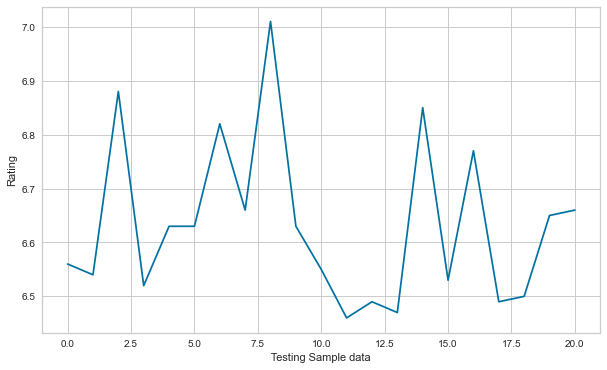

In [143]:

#Plotting the observed and predicted data
import matplotlib.pyplot as plt 
#Setting the boundaries and parameters
plt.rcParams['figure.figsize']=(10,6)
x_ax = range(len(X_test))
#Plotting 
plt.plot(x_ax , y_test.values.ravel())
plt.plot(x_ax , ytest_pred)
plt.ylabel("Rating")
plt.xlabel(" Testing Sample data ")

C:\Users\ashok\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


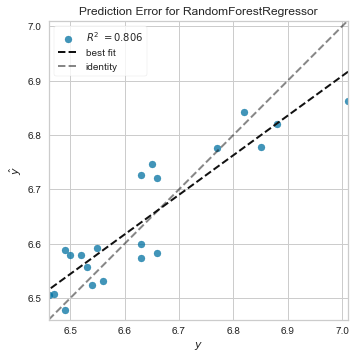

<AxesSubplot:title={'center':'Prediction Error for RandomForestRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [129]:
#Plotting the prediction errors and residuals using yellowbrick 
#Plotting the prediction errors 
import yellowbrick
from yellowbrick.regressor import PredictionError
visualizer = PredictionError(LL_rf)
visualizer.fit(X_train , y_train)
visualizer.score(X_test,y_test.values.ravel())
visualizer.poof()

In [133]:
#The k-fold CV 
from sklearn.model_selection import cross_val_score

#Training model CV 
score_train = cross_val_score(LL_rf,X_train , y_train , scoring='neg_mean_squared_error' , cv=10)

scor_train

C:\Users\ashok\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ashok\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ashok\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ashok\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

array([-0.0063901 , -0.00242404, -0.0046608 , -0.00657943, -0.0007296 ,
       -0.0028311 , -0.00139268, -0.00765804, -0.00218853, -0.01062865])

In [134]:
#THe absolute mean score 
from numpy import absolute
print(absolute(np.mean(scor_train)))

0.004548297209821422


In [135]:
#THe  mean score 
from numpy import absolute
print(np.mean(scor_train))

-0.004548297209821422


In [136]:
#Testing  model CV  or On the testing dataset
score_test = cross_val_score(LL_rf,X_test , y_test , scoring='neg_mean_squared_error' , cv=10)

score_test

C:\Users\ashok\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ashok\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ashok\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ashok\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

array([-0.00093835, -0.00063281, -0.00274212, -0.01900991, -0.00544366,
       -0.00096231, -0.00556928, -0.01305856, -0.00970563, -0.00036003])

In [137]:
print(absolute(np.mean(score_test)))

0.00584226666666674


In [140]:
#Random Forest Feature Ranking 
#Import pandas as pd 

from sklearn.pipeline import Pipeline

f_list = list(X.columns)
f_importance  = pd.Series(LL_rf.feature_importances_ , index = f_list).sort_values(ascending = False)
print(f_importance)

Goals           0.644375
Shots pg        0.150464
yellow_cards    0.057535
Pass%           0.055915
Possession%     0.034974
red_cards       0.032383
AerialsWon      0.024352
dtype: float64


In [141]:
import statsmodels.api as sm

# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)
# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

# Print the parameters,i.e. intercept and slope of the regression line obtained
lr.params

#Performing a summary operation lists out all different parameters of the regression line fitted
print(lr.summary())


                            OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     63.33
Date:                Sat, 10 Dec 2022   Prob (F-statistic):           1.54e-27
Time:                        02:43:52   Log-Likelihood:                 127.36
No. Observations:                  77   AIC:                            -238.7
Df Residuals:                      69   BIC:                            -220.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            5.2750      0.245     21.553   

In [1]:
cd Downloads

C:\Users\ashok\Downloads


In [2]:
cd Project

C:\Users\ashok\Downloads\Project


In [4]:
#Thon e coeff of determination
#Training model evaluation 
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score , explained_variance_score
print(r2_score(y_test , ytest_pred))

NameError: name 'y_test' is not defined